In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()

#### Exploratory analysis of data

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Cleaning the dataset

In [9]:
df['target'] = iris.target
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df[df['target']==1].head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [13]:
df[df['target']==0].head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [14]:
df[df['target']==2].head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [16]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#### Visualization on basis of target names

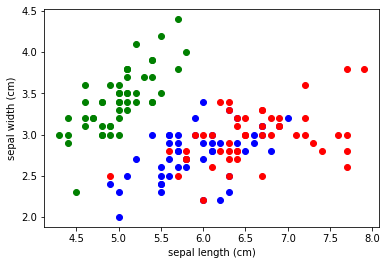

In [21]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',label='setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue', label='versicolor')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

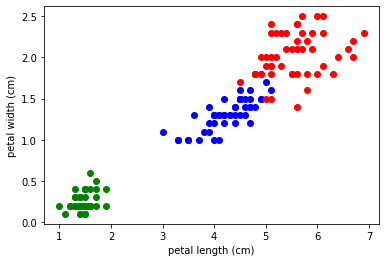

In [22]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',label='setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', label='versicolor')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red',label='virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

#### Applying train_test_split

In [23]:
X = df.drop(['target','flower_name'], axis = 'columns')
Y = df['target']

In [24]:
X.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
Y.head(150)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [26]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [27]:
len(X_train)

120

In [28]:
len(X_test)

30

#### Applying SVC

In [29]:
model = SVC()

In [30]:
model.fit(X_train,Y_train)

SVC()

In [33]:
model.score(X_test,Y_test)

0.9666666666666667